In [1]:
import pymongo
import pandas as pd

In [4]:
data =pd.read_csv(r"climate_change_data.csv")
df = pd.DataFrame(data)
df.head()

Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164

In [5]:
 # Summary statistics of the numerical columns
df.describe() 

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664

In [6]:
# Information about the DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [7]:
 # Check for missing values
df.isnull().sum() 

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [9]:
data=df
data['Date']=pd.to_datetime(data['Date'])
data['Date Only']=data['Date'].dt.date
data['Year']=data['Date'].dt.year
df.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  \
0     403.118903        0.717506      13.835237  23.631256   18.492026   
1     396.663499        1.205715      40.974084  43.982946   34.249300   
2     451.553155       -0.160783      42.697931  96.652600   34.124261   
3     422.404983       -0.475931       5.193341  47.467938    8.554563   
4     410.472999        1.135757      78.695280  61.789672    8.001164   

    Date Only  Year  
0  2000-01-01  2000  
1  2000-01-01  2000  
2  2000-01-02  2000  
3  2000-01-03  2000  
4  2000-01-04  2000

In [10]:
numerical_data = df.select_dtypes(include = ['float','int'])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     10000 non-null  float64
 1   CO2 Emissions   10000 non-null  float64
 2   Sea Level Rise  10000 non-null  float64
 3   Precipitation   10000 non-null  float64
 4   Humidity        10000 non-null  float64
 5   Wind Speed      10000 non-null  float64
 6   Year            10000 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 507.9 KB


Visualization of Data

Heat Map

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

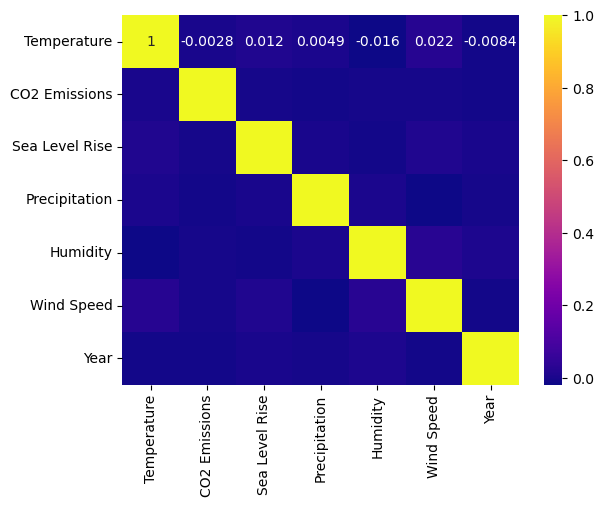

In [12]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='plasma')  # Correlation matrix heatmap
plt.show()

Pair Plot

C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

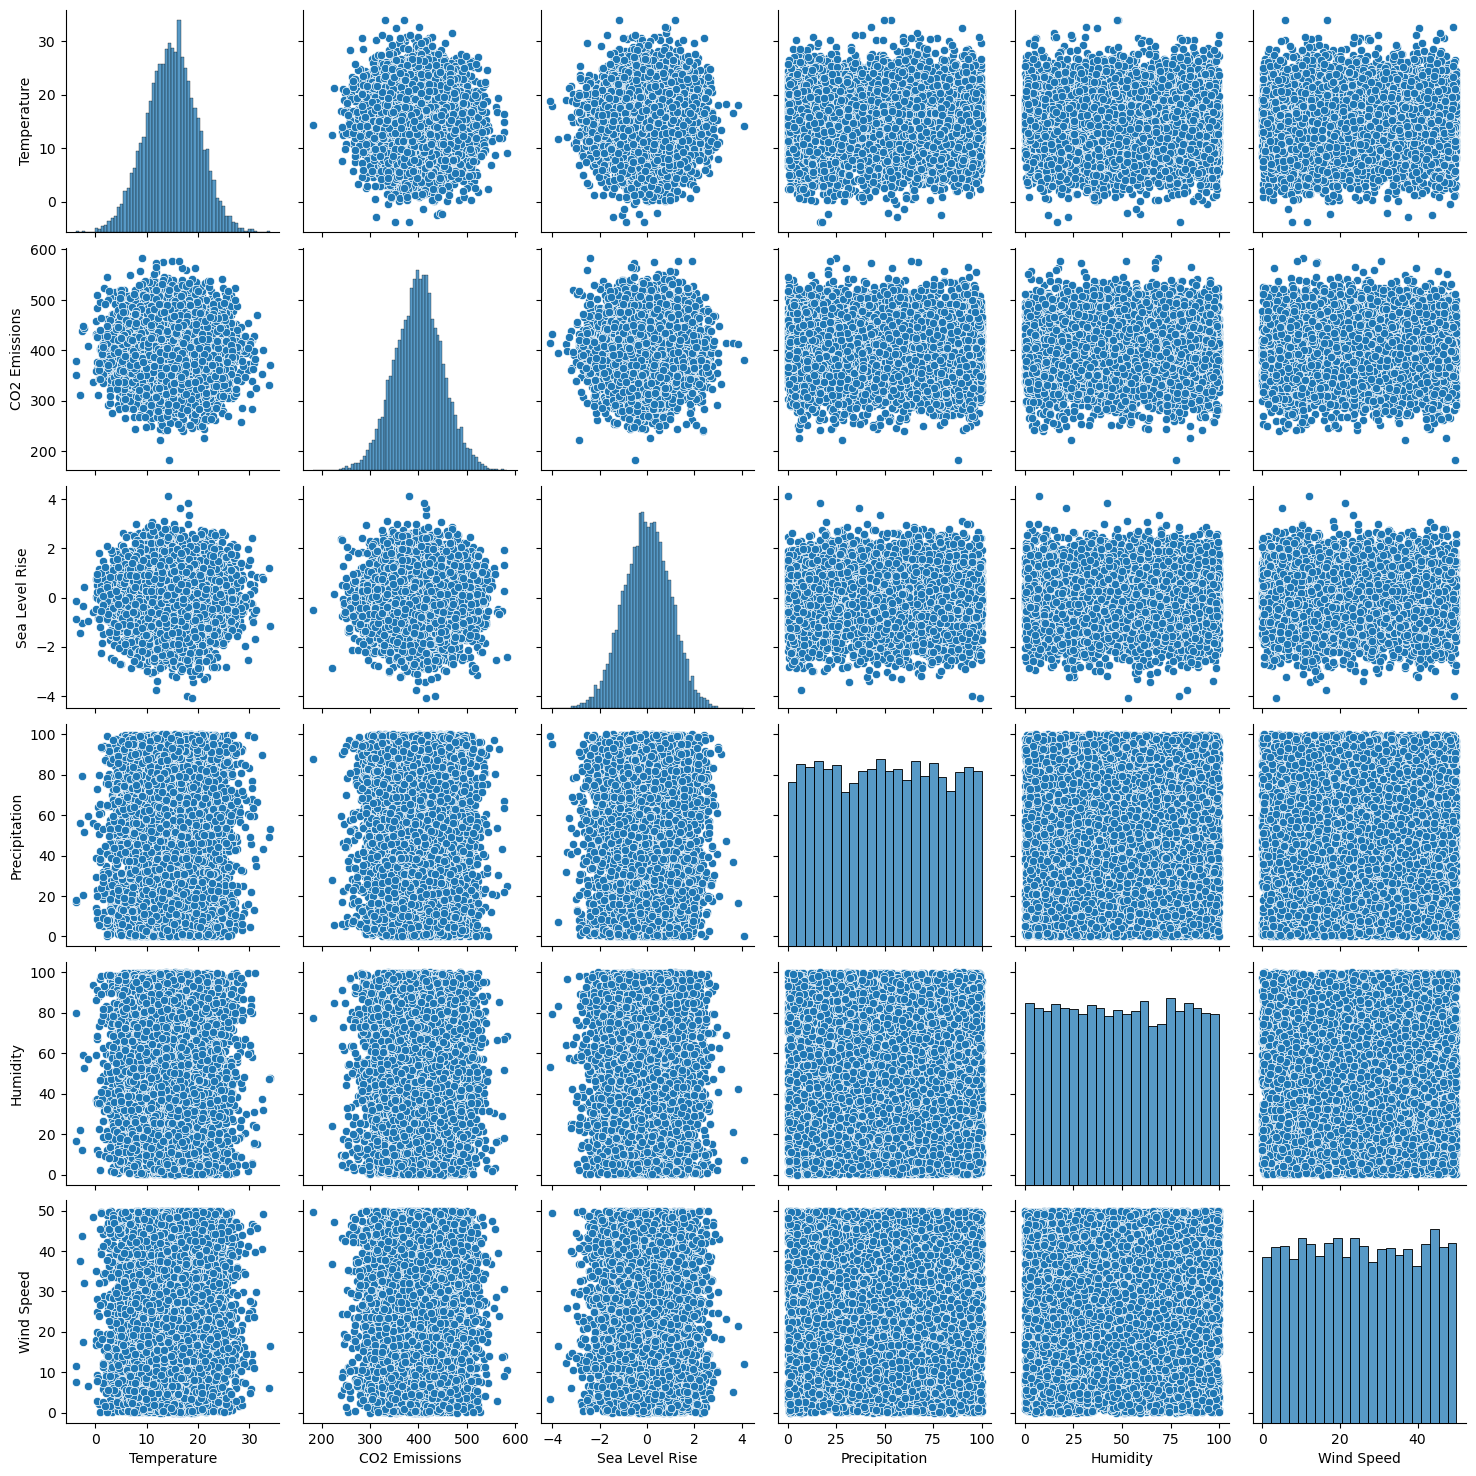

In [15]:
sns.pairplot(df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']])
plt.show()

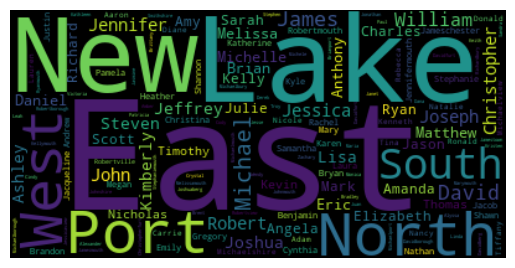

In [17]:
# Create a word cloud of locations
wordcloud = WordCloud().generate(' '.join(df['Location']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

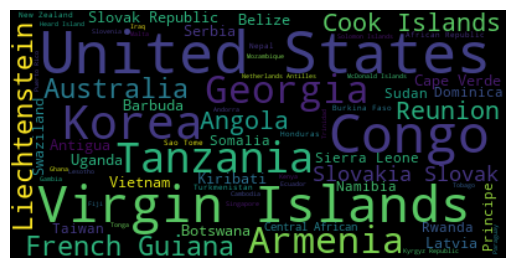

In [18]:
wordcloud = WordCloud().generate(' '.join(data['Country']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 0, 'Wind Speed')

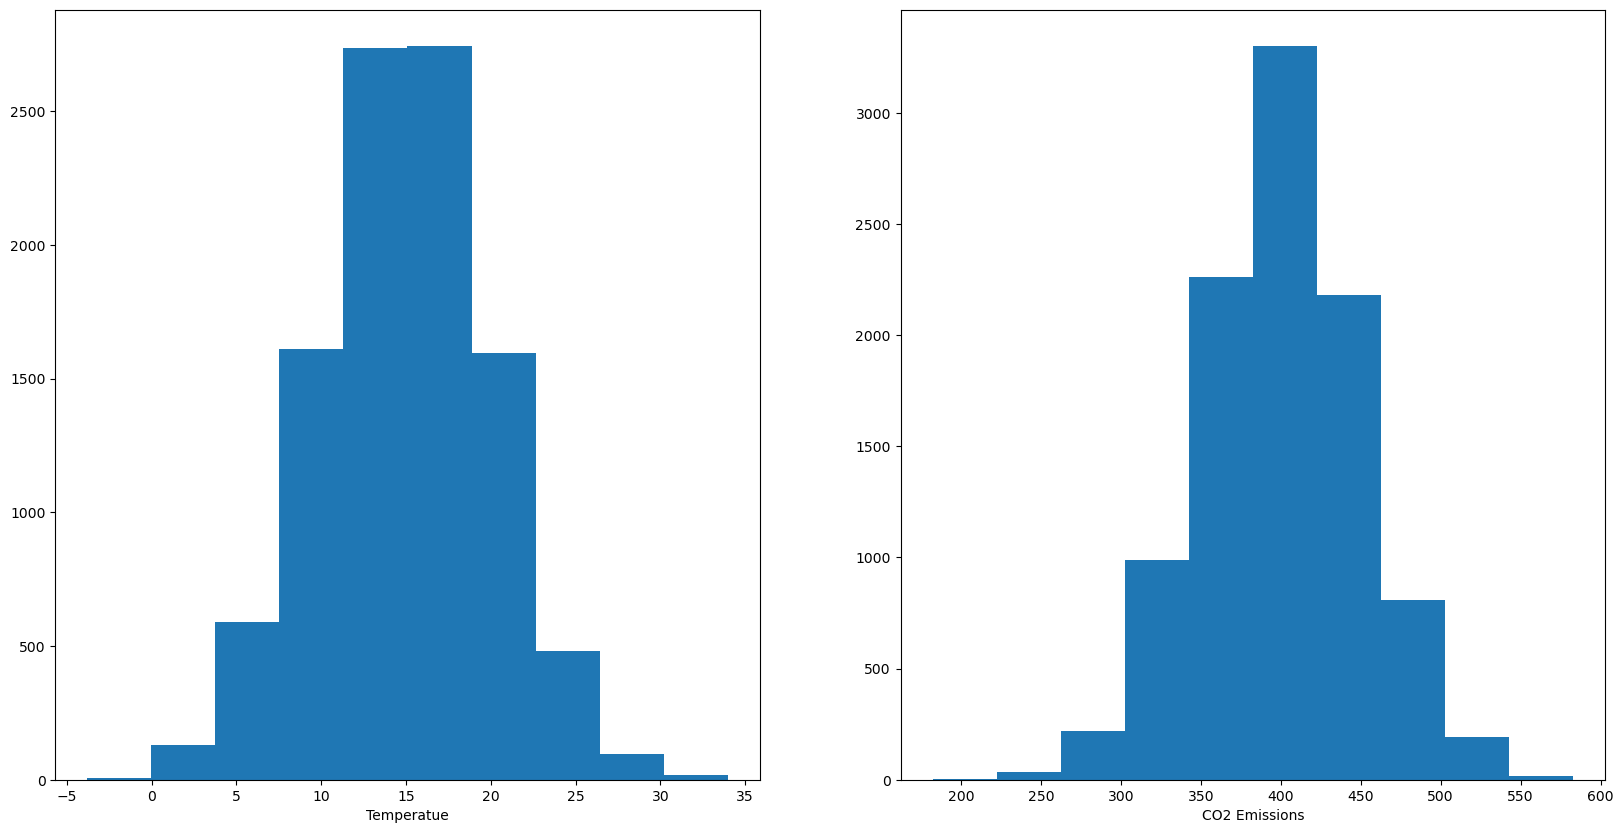

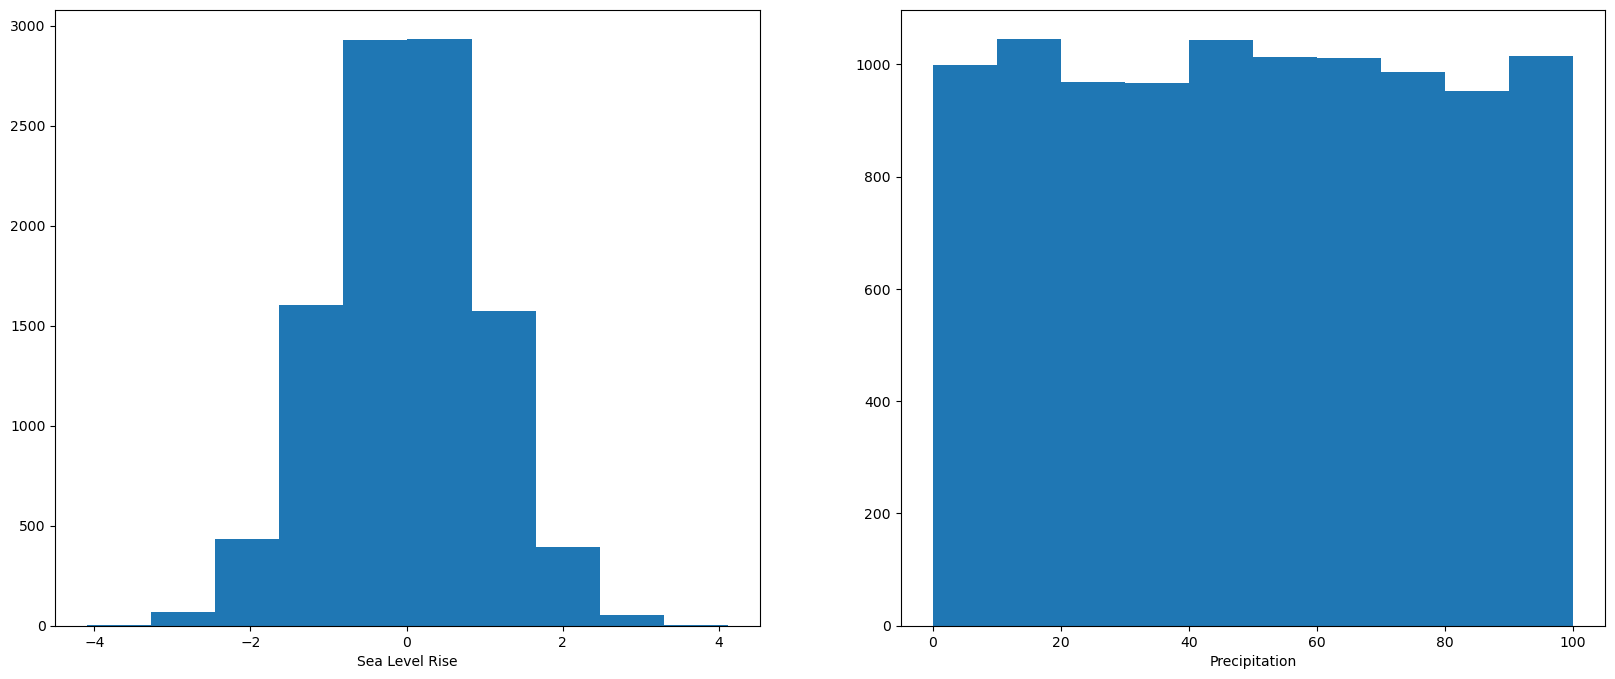

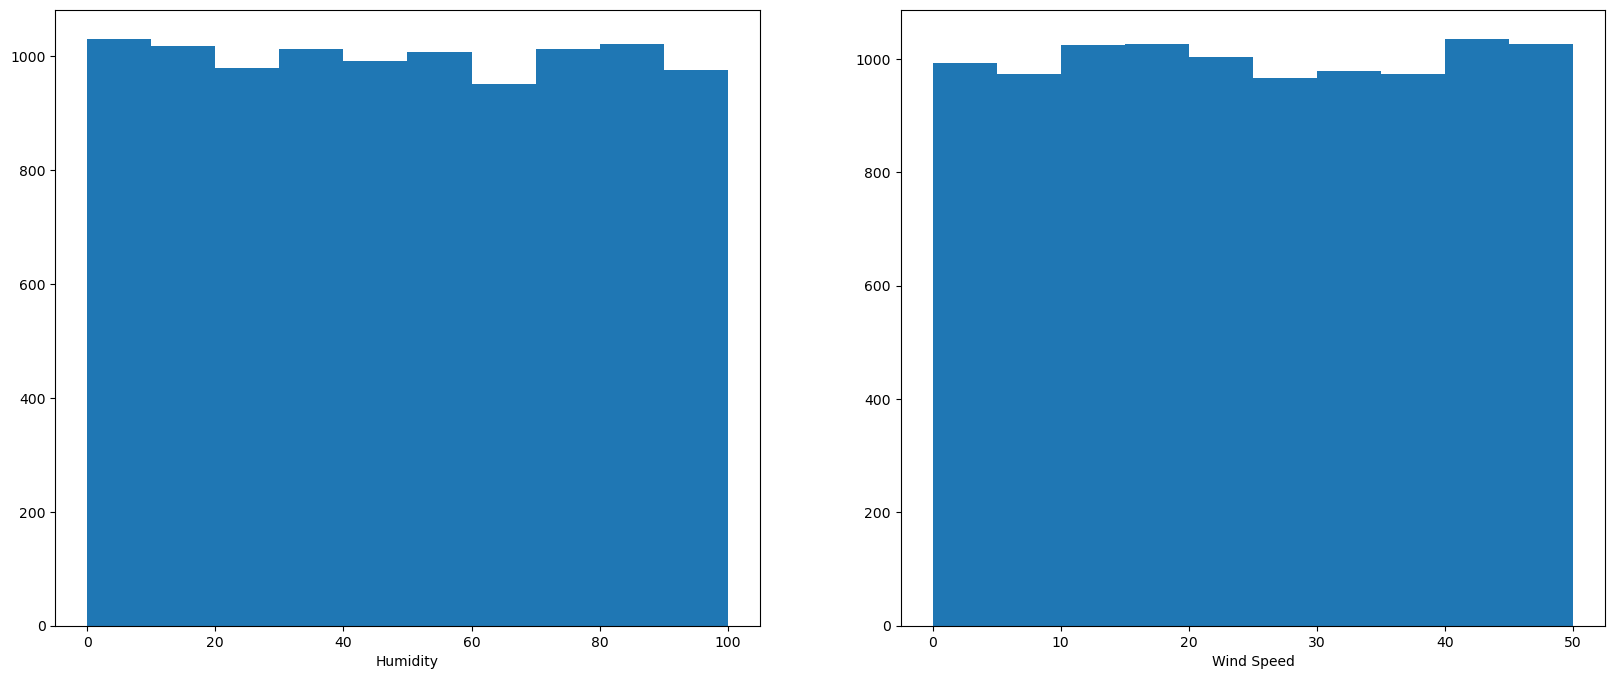

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(data['Temperature'])
plt.xlabel('Temperatue')
plt.subplot(1,2,2)
plt.hist(data['CO2 Emissions'])
plt.xlabel('CO2 Emissions')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(data['Sea Level Rise'])
plt.xlabel('Sea Level Rise')
plt.subplot(1,2,2)
plt.hist(data['Precipitation'])
plt.xlabel('Precipitation')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(data['Humidity'])
plt.xlabel('Humidity')
plt.subplot(1,2,2)
plt.hist(data['Wind Speed'])
plt.xlabel('Wind Speed')

C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Year', ylabel='Wind Speed'>

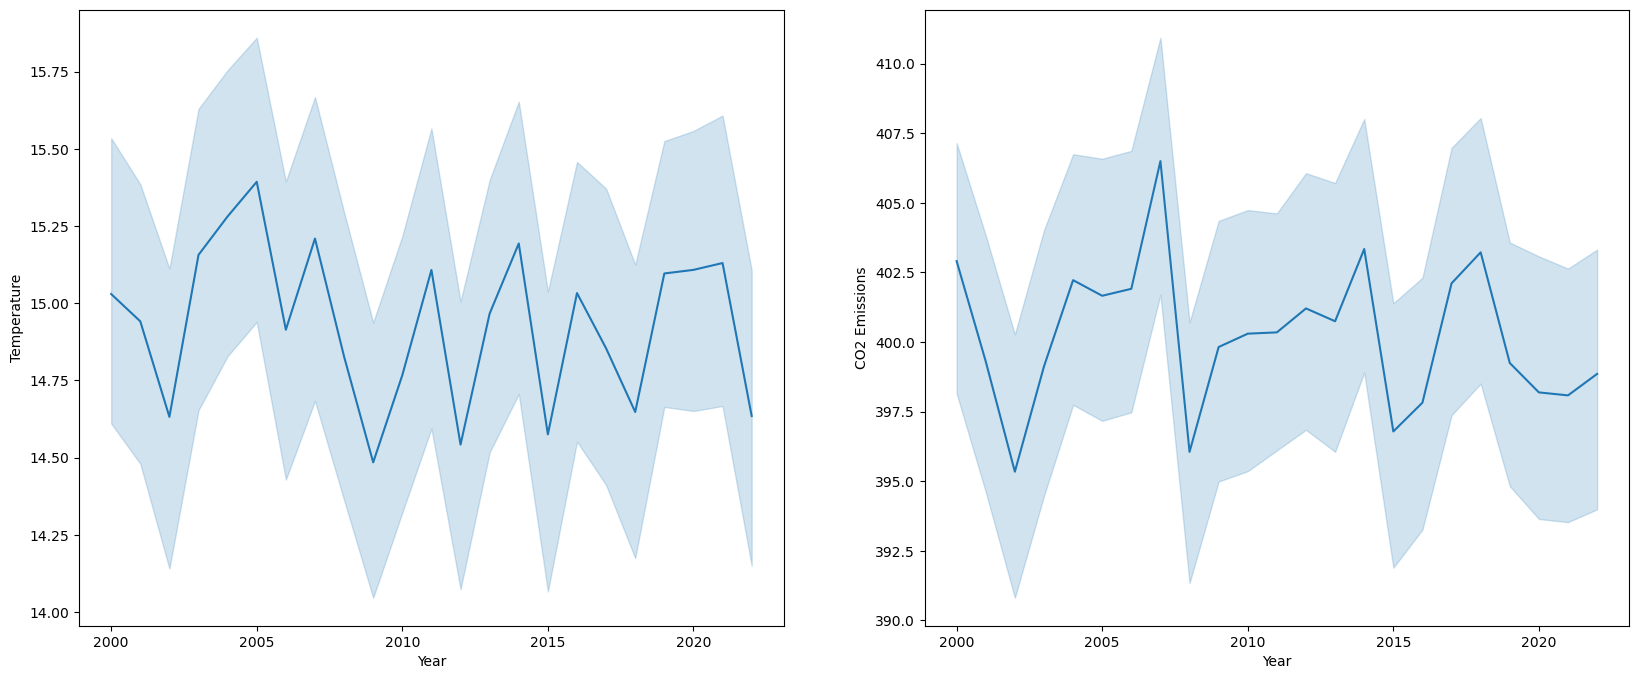

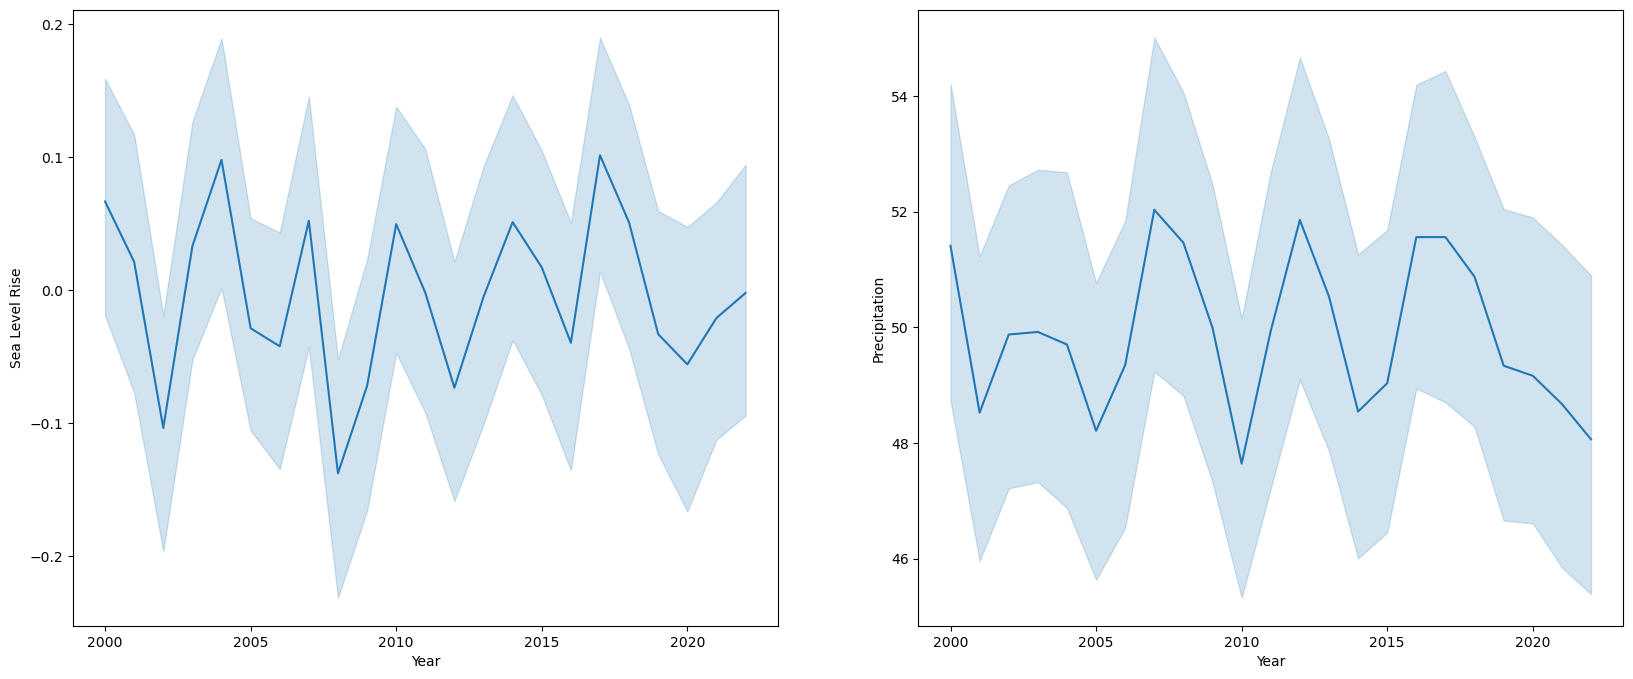

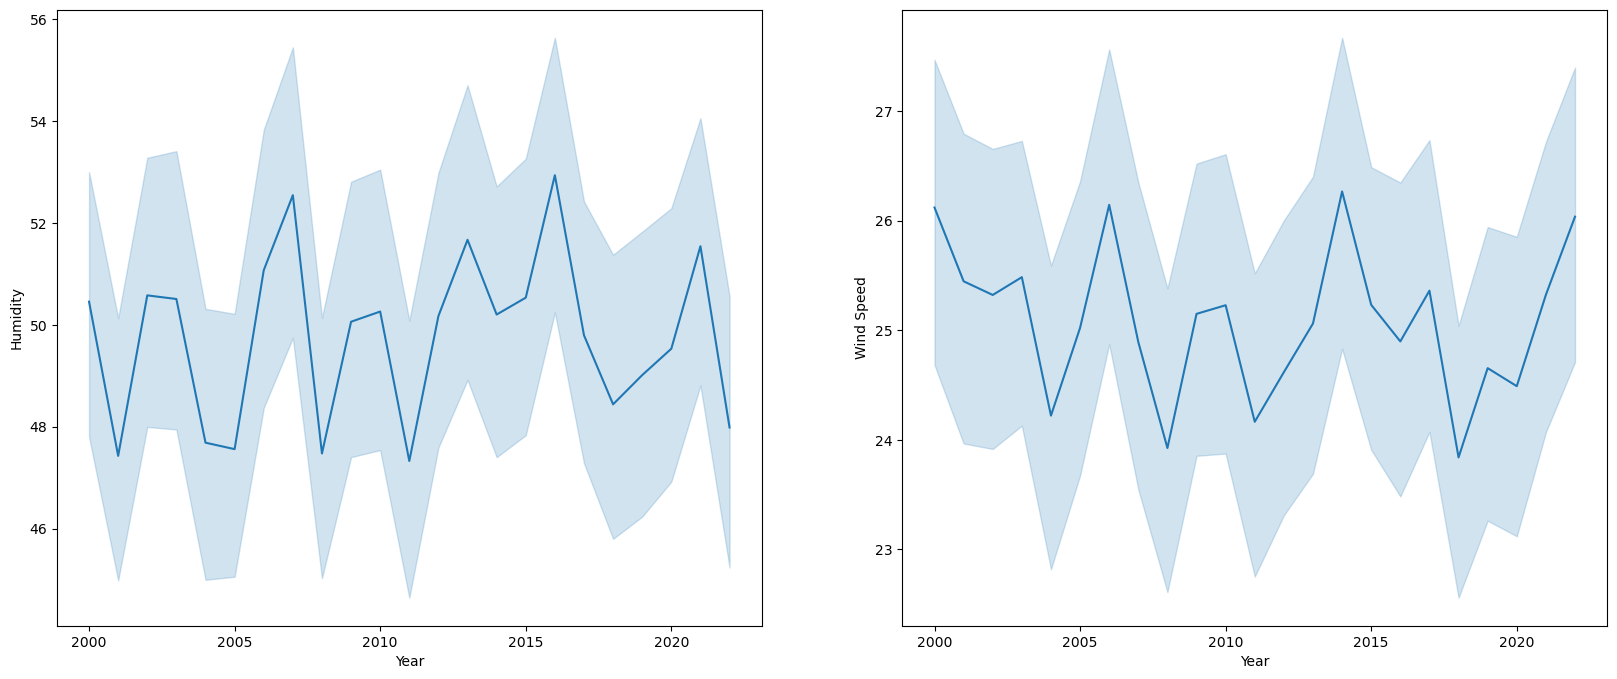

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Temperature',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='CO2 Emissions',data=df)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Sea Level Rise',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Precipitation',data=df)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Humidity',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Wind Speed',data=df)

DIST PLOT

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\1864910268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature', ylabel='Density'>

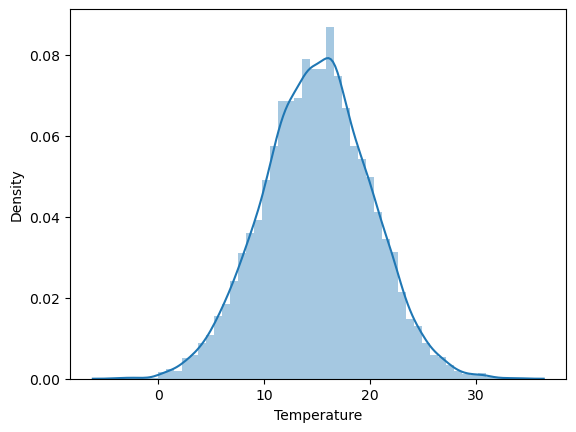

In [24]:
sns.distplot(df['Temperature'])

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\4143924856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2 Emissions'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CO2 Emissions', ylabel='Density'>

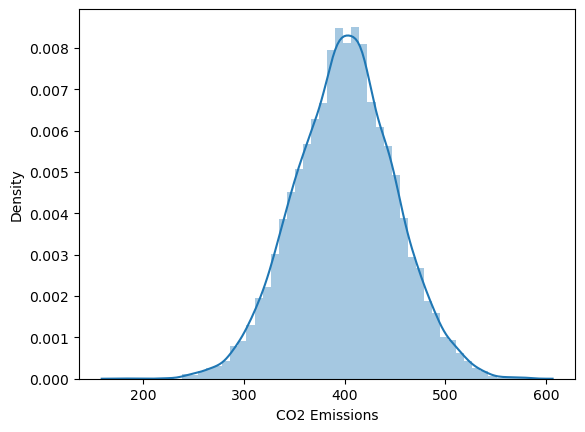

In [25]:
sns.distplot(df['CO2 Emissions'])

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\2191069147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sea Level Rise'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sea Level Rise', ylabel='Density'>

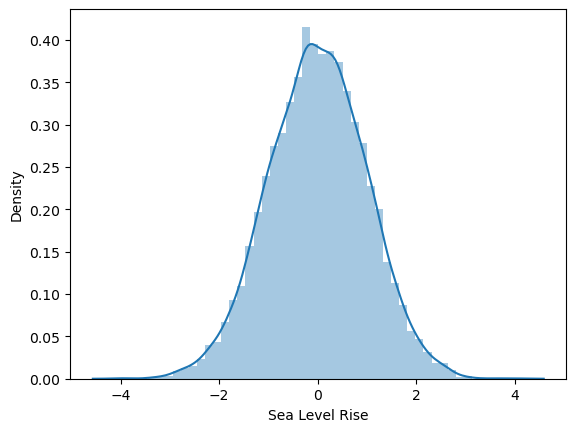

In [26]:
sns.distplot(df['Sea Level Rise'])

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\3123702065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Precipitation'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Precipitation', ylabel='Density'>

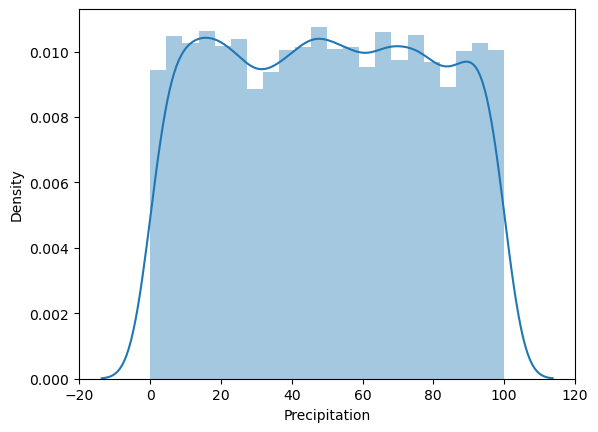

In [27]:
sns.distplot(df['Precipitation'])

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\4017267088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity', ylabel='Density'>

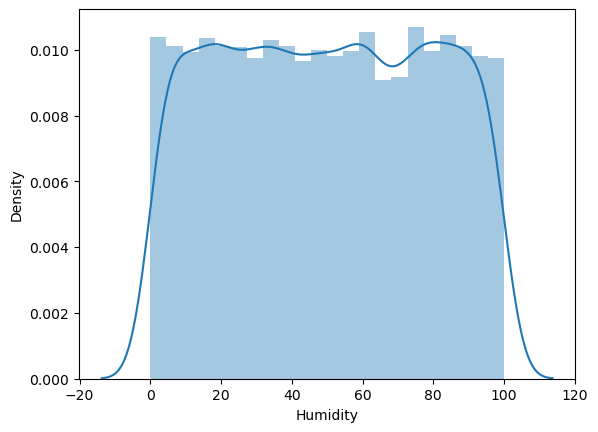

In [28]:
sns.distplot(df['Humidity'])

C:\Users\melin\AppData\Local\Temp\ipykernel_20612\3043874492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Wind Speed'])
C:\Users\melin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind Speed', ylabel='Density'>

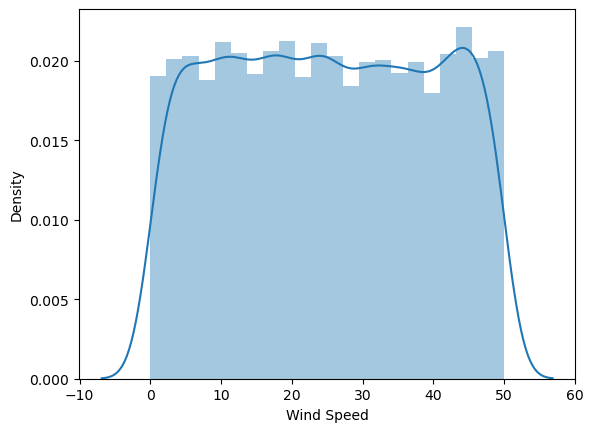

In [29]:
sns.distplot(df['Wind Speed'])

BOX PLOT

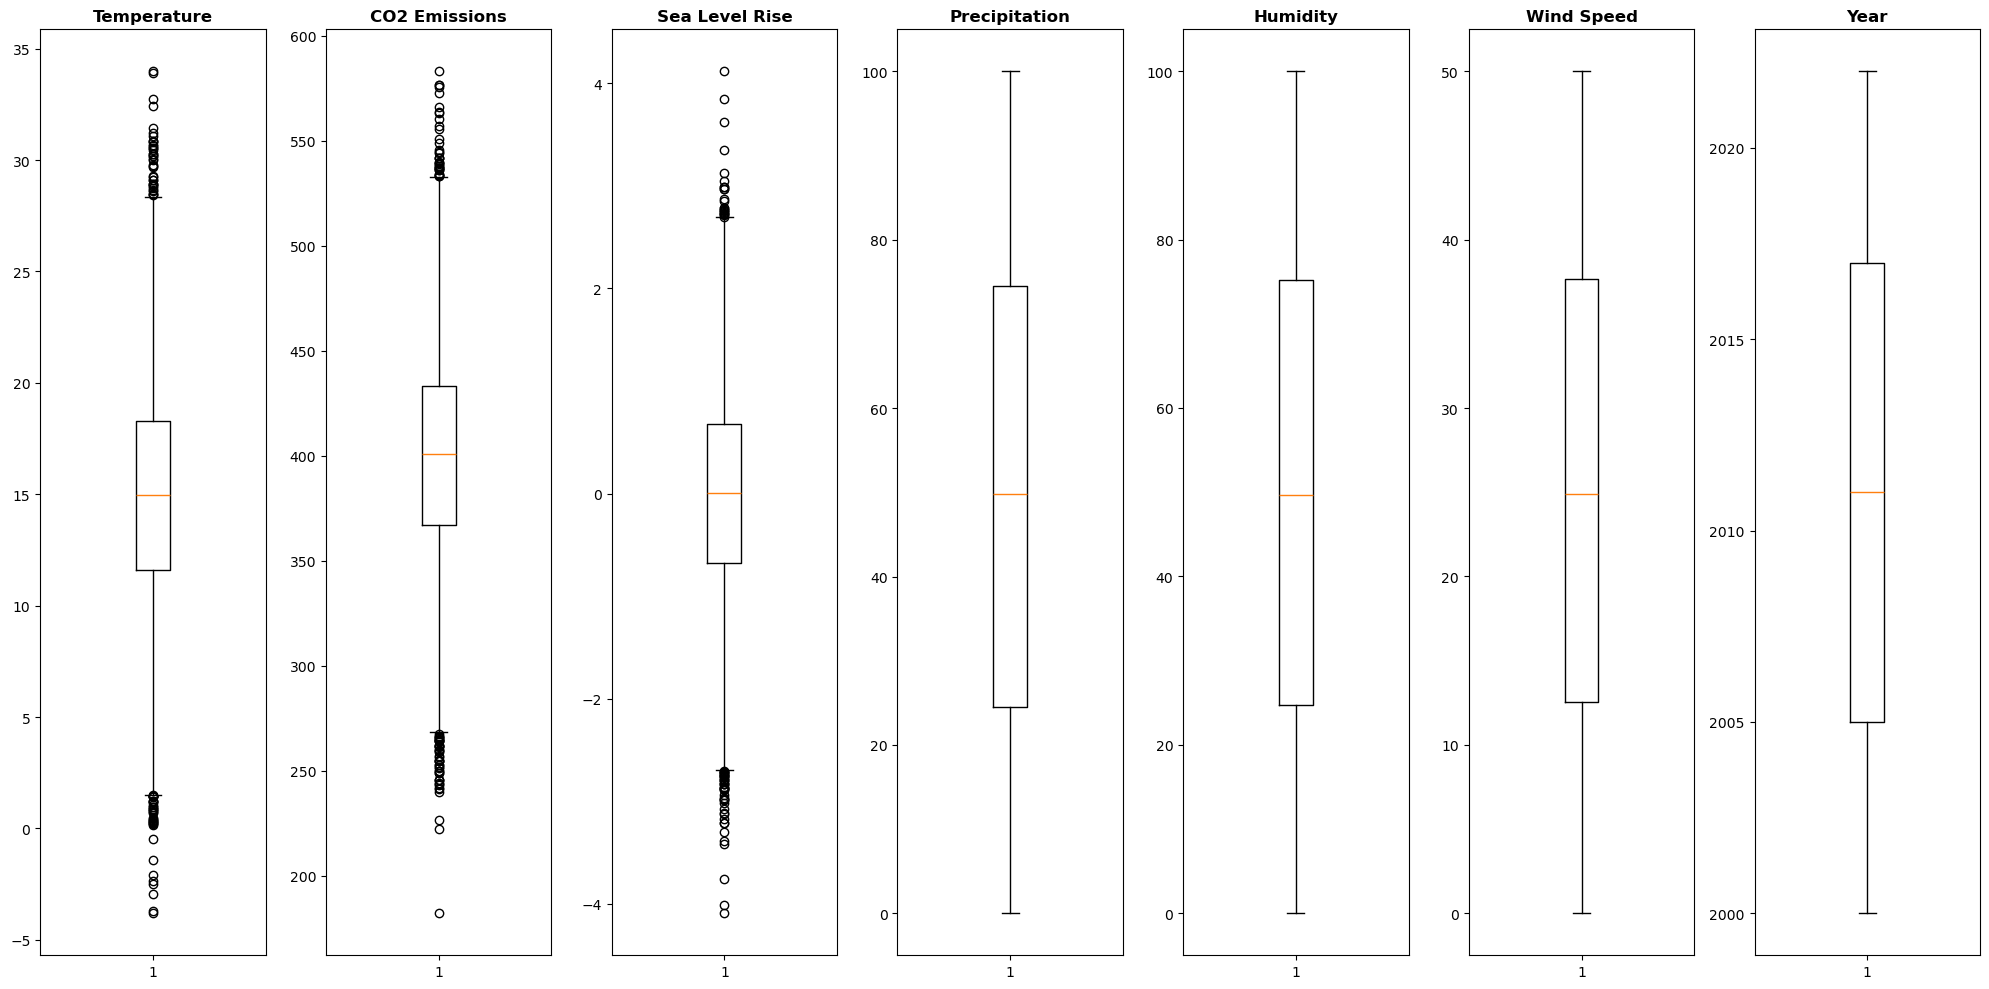

In [30]:
fig, axs = plt.subplots(1, len(numerical_data.columns), figsize = (20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_data.iloc[:,i])
    ax.set_title(numerical_data.columns[i],fontweight = 'bold')
    ax.tick_params(axis='y')
    
plt.tight_layout()

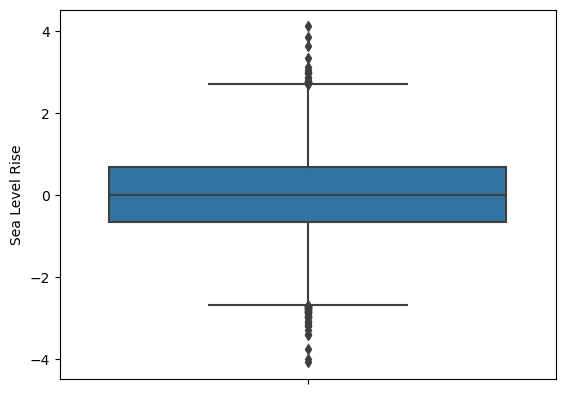

In [32]:
# Boxplot of Sea Level Rise
sns.boxplot(y='Sea Level Rise', data=data)
plt.ylabel('Sea Level Rise')
plt.show()

SCATTERED PLOT

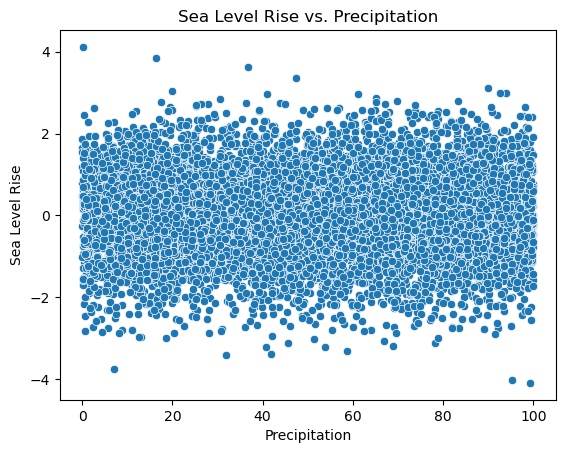

In [34]:
# Scatter plot of Sea Level Rise vs. Precipitation
sns.scatterplot(x='Precipitation', y='Sea Level Rise', data=data)
plt.xlabel('Precipitation')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise vs. Precipitation')
plt.show()

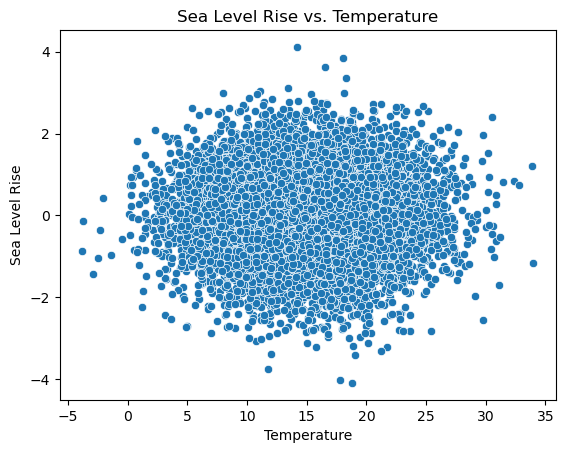

In [35]:
# Scatter plot of Sea Level Rise vs. Temperature
sns.scatterplot(x='Temperature', y='Sea Level Rise', data=data)
plt.xlabel('Temperature')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise vs. Temperature')
plt.show()

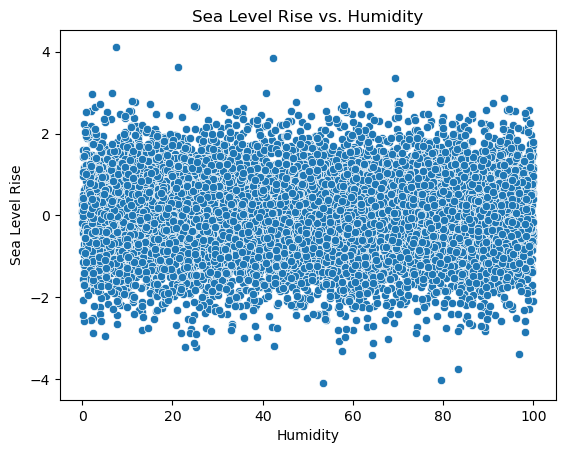

In [36]:
# Scatter plot of Sea Level Rise vs.Humidity
sns.scatterplot(x='Humidity', y='Sea Level Rise', data=data)
plt.xlabel('Humidity')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise vs. Humidity')
plt.show()

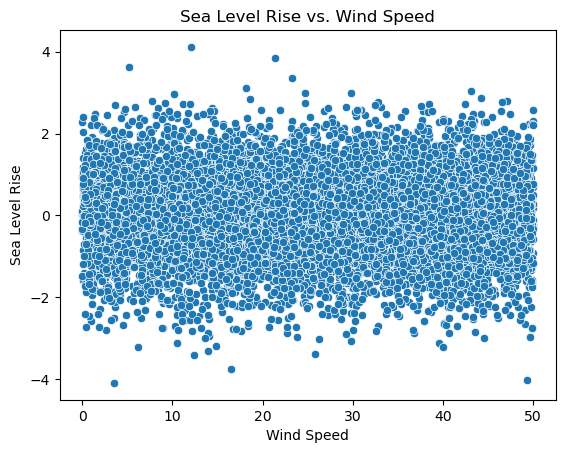

In [37]:
# Scatter plot of Sea Level Rise vs.Wind Speed
sns.scatterplot(x='Wind Speed', y='Sea Level Rise', data=data)
plt.xlabel('Wind Speed')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise vs. Wind Speed')
plt.show()

In [38]:
import plotly.express as px
import plotly.io as pio

In [39]:
df["Date"]=pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].apply(lambda x: x.strftime('%B')) 
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [40]:
import plotly.graph_objects as go

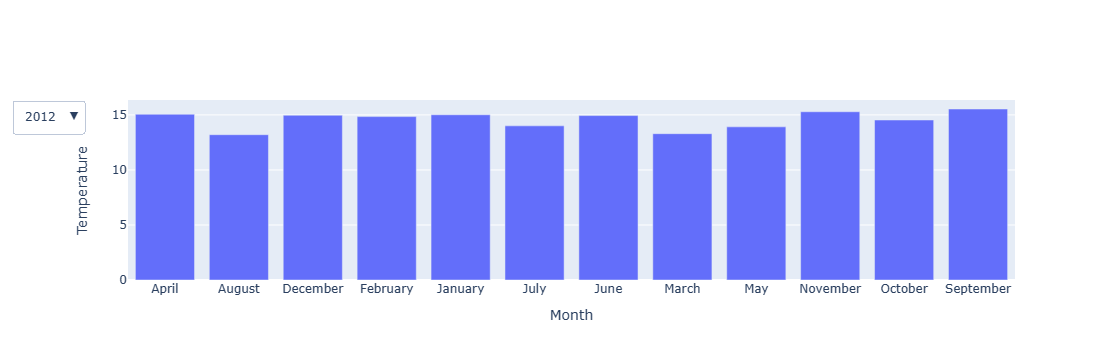

In [41]:
Year = sorted(set(df["Year"]))
fig=go.Figure()
region_plot_names = []
buttons=[]
default_year = 2012
for region_name in Year:
    region=df[df["Year"]==region_name].groupby(by=["Year","Month"])["Temperature"].mean().reset_index()

    fig.add_trace(go.Bar(x=region["Month"], y=region["Temperature"],visible=(region_name==default_year)))
  
    region_plot_names.extend([region_name])
    
for region_name in Year:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": Year.index(default_year)}])
fig.update_layout(yaxis_title="Temperature", xaxis_title="Month")
fig.show()

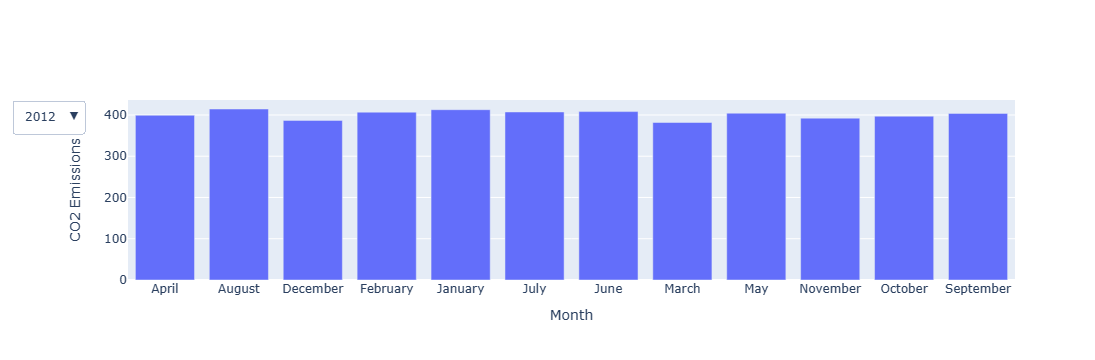

In [42]:
Year = sorted(set(df["Year"]))
fig=go.Figure()
region_plot_names = []
buttons=[]
default_year = 2012
for region_name in Year:
    region=df[df["Year"]==region_name].groupby(by=["Year","Month"])["CO2 Emissions"].mean().reset_index()

    fig.add_trace(go.Bar(x=region["Month"], y=region["CO2 Emissions"],visible=(region_name==default_year)))
  
    region_plot_names.extend([region_name])
    
for region_name in Year:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": Year.index(default_year)}])
fig.update_layout(xaxis_title="Month", yaxis_title="CO2 Emissions")
fig.show()

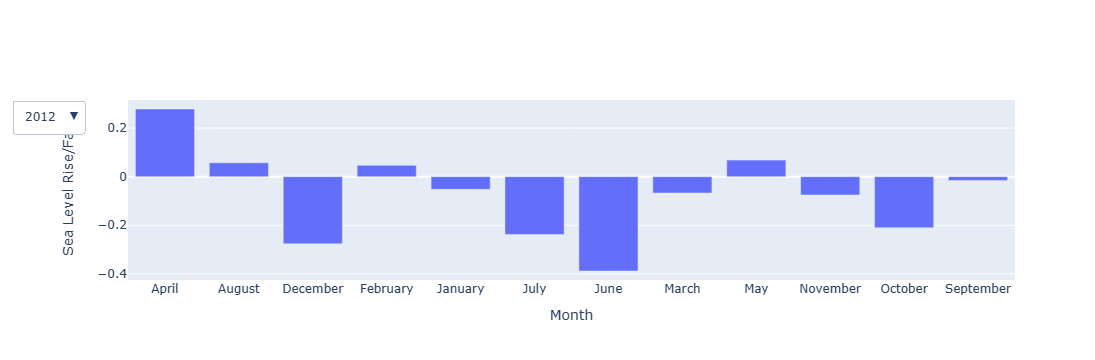

In [43]:
Year = sorted(set(df["Year"]))
fig=go.Figure()
region_plot_names = []
buttons=[]
default_year = 2012
for region_name in Year:
    region=df[df["Year"]==region_name].groupby(by=["Year","Month"])["Sea Level Rise"].mean().reset_index()

    fig.add_trace(go.Bar(x=region["Month"], y=region["Sea Level Rise"],visible=(region_name==default_year)))
  
    region_plot_names.extend([region_name])
    
for region_name in Year:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": Year.index(default_year)}])
fig.update_layout(xaxis_title="Month", yaxis_title="Sea Level Rise/Fall")
fig.show()

In [45]:
searise=df.groupby(by="Country")["Sea Level Rise"].mean().reset_index()

In [46]:
seafall=searise[searise["Sea Level Rise"].astype(str).str.contains("-")]
searise=searise[~searise.isin(seafall)]
searise.dropna(inplace=True)

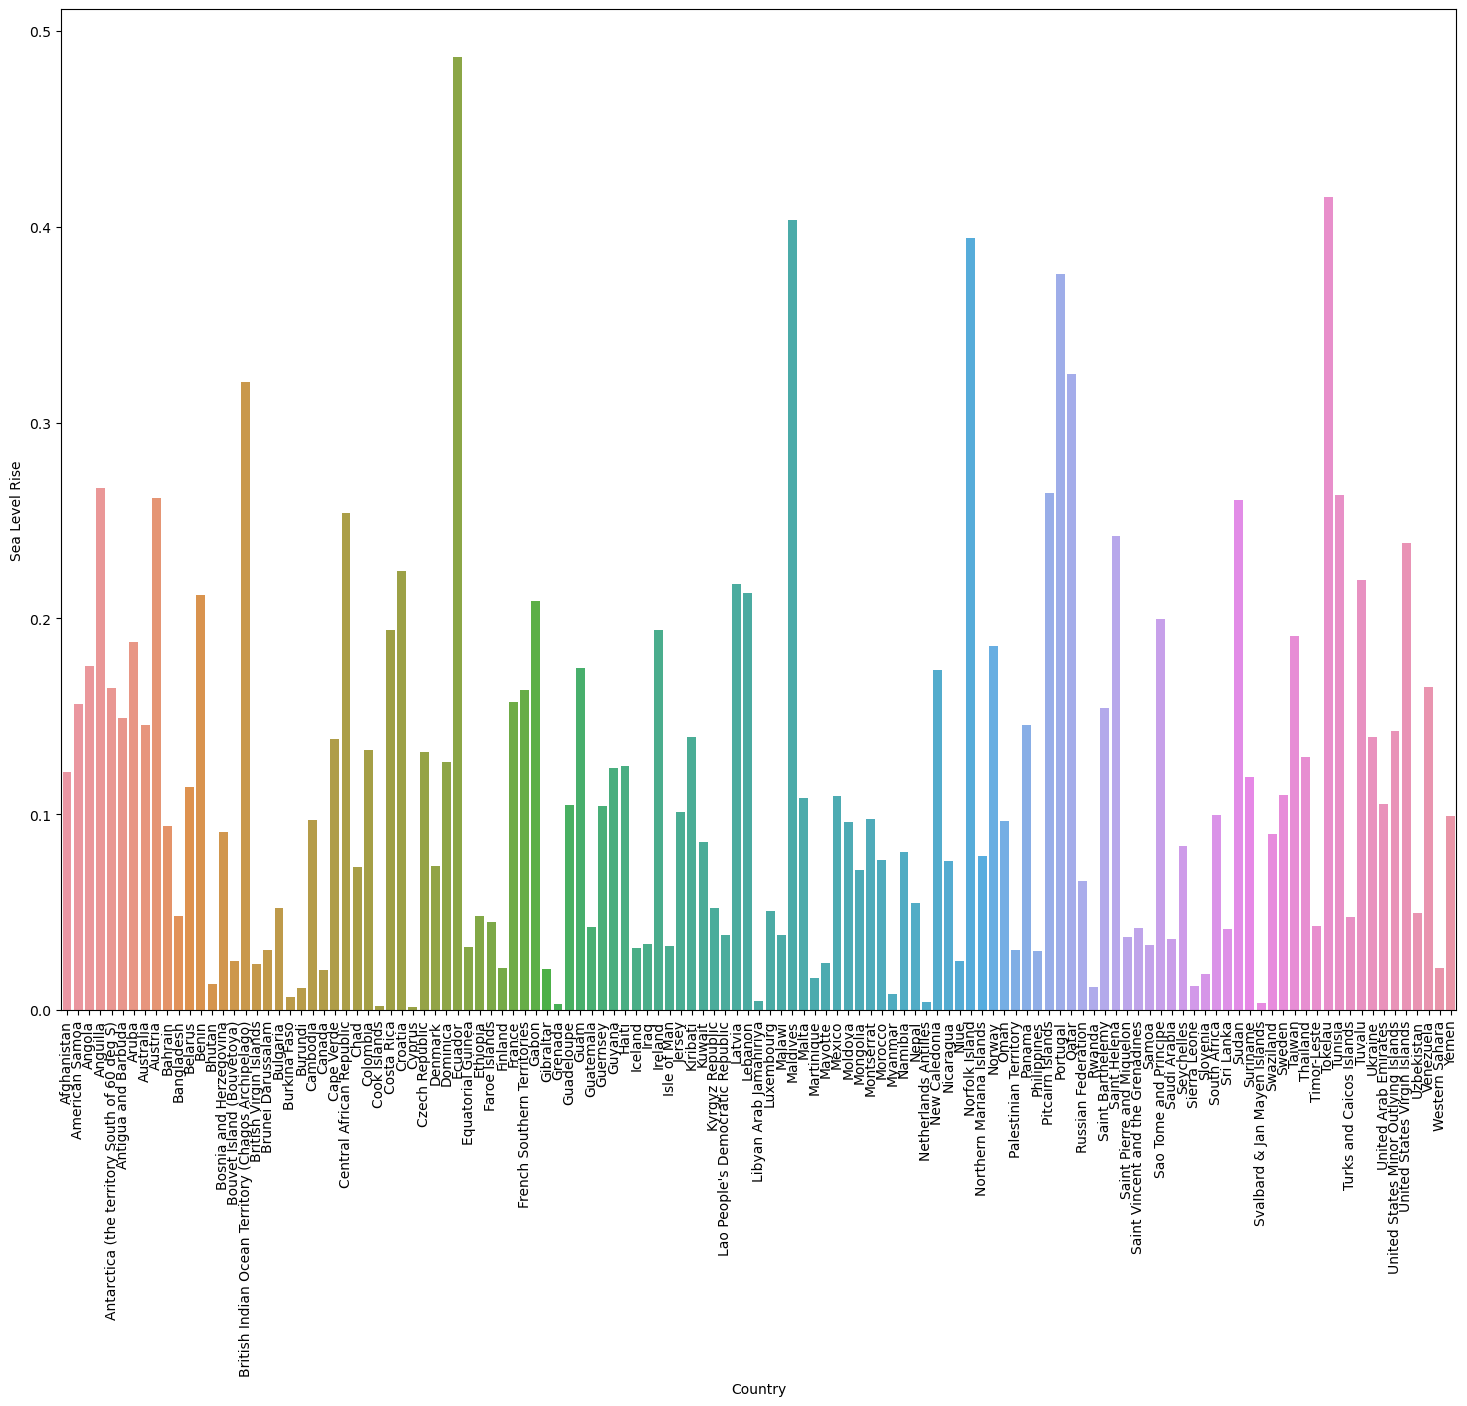

In [49]:
plt.figure(figsize=(18,13))
sns.barplot(data=searise,x="Country",y="Sea Level Rise")
plt.xticks(rotation="vertical")
plt.show()

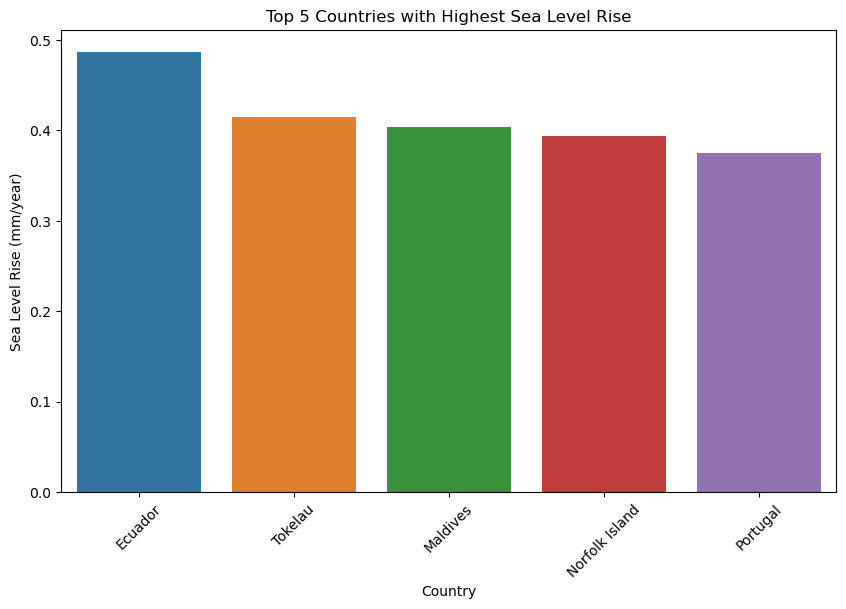

In [1]:
top_countries = df.groupby('Country')['Sea Level Rise'].mean().nlargest(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Country')
plt.ylabel('Sea Level Rise (mm/year)')
plt.title('Top 5 Countries with Highest Sea Level Rise')
plt.xticks(rotation=45)
plt.show()


In [50]:
temp=data['Temperature'].sort_values()
temp

7663    -3.803589
946     -3.709565
4822    -2.921056
6864    -2.487518
7990    -2.338728
          ...    
2224    31.455420
2839    32.403159
4370    32.745123
9228    33.907976
5601    33.976956
Name: Temperature, Length: 10000, dtype: float64

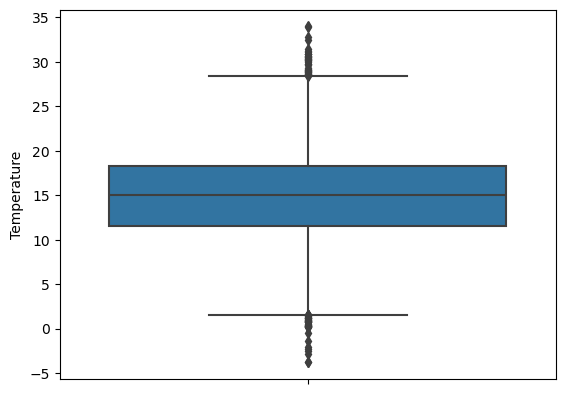

In [51]:
# Boxplot of temp
sns.boxplot(y='Temperature', data=data)
plt.ylabel('Temperature')
plt.show()

In [52]:
q1=temp.quantile(0.25)
q3=temp.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: 11.577991282292246
The value of q3 is: 18.30582624415652


In [53]:
iqr = q3 - q1
print("The value of iqr is:",iqr)

The value of iqr is: 6.727834961864275


In [54]:
upper=q1-1.5*iqr
lower=q3+1.5*iqr

print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))

The value of upper bound is: 1
The value of lower bound is: 28


In [56]:
clean_temp=temp[~((temp<(upper))  |  (temp>(lower)))]
clean_temp

9252     1.486266
743      1.498916
8440     1.587629
1129     1.718002
2623     1.725605
          ...    
6807    28.265915
1679    28.293390
5267    28.296467
8403    28.330762
9322    28.361630
Name: Temperature, Length: 9924, dtype: float64

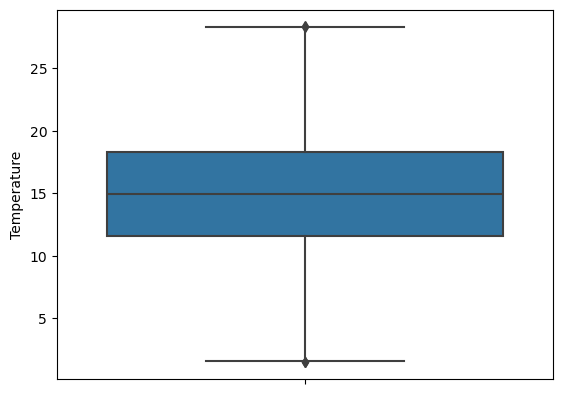

In [57]:
sns.boxplot(y=clean_temp)
plt.show()

In [58]:
co2=data['CO2 Emissions'].sort_values()
co2

9888    182.131220
7016    222.104943
4322    226.370250
2703    239.630431
956     241.219695
           ...    
4004    572.692033
649     575.653710
3662    576.498970
5886    576.650885
442     582.899701
Name: CO2 Emissions, Length: 10000, dtype: float64

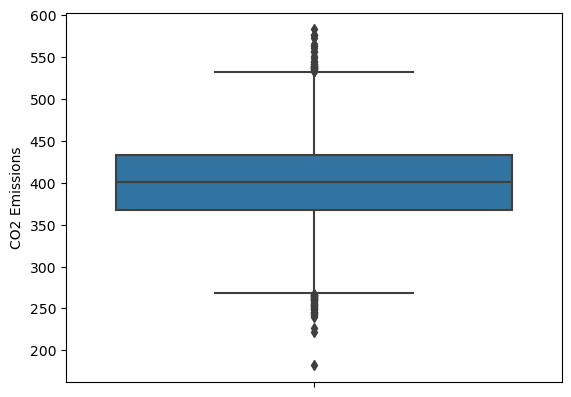

In [59]:
sns.boxplot(y='CO2 Emissions', data=data)
plt.ylabel('CO2 Emissions')
plt.show()

In [60]:
q1=co2.quantile(0.25)
q3=co2.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: 367.10933034978495
The value of q3 is: 433.30790534678715


In [61]:
iqr = q3 - q1
print("The value of iqr is:",iqr)


The value of iqr is: 66.1985749970022


In [62]:
upper=q1-1.5*iqr
lower=q3+1.5*iqr

print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))

The value of upper bound is: 268
The value of lower bound is: 533


In [64]:
clean_co2=co2[~((co2<(upper))  |  (co2>(lower)))]
clean_co2

1060    268.164350
2514    268.189173
9091    268.275903
8781    268.649888
8910    268.652664
           ...    
8827    530.379311
9949    531.894745
7888    532.225775
5804    532.408919
6014    532.556055
Name: CO2 Emissions, Length: 9918, dtype: float64

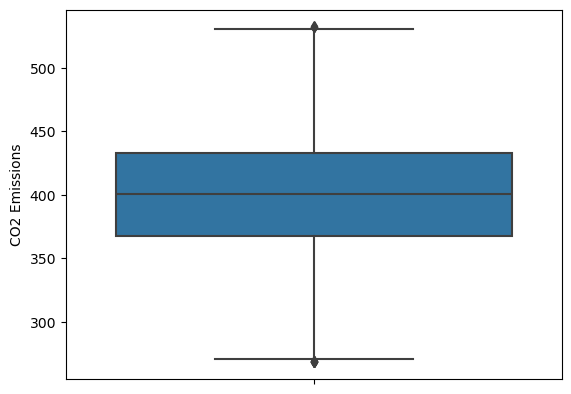

In [65]:
sns.boxplot(y=clean_co2)
plt.show()

In [71]:
# Split the data into training and testing sets
X = data[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed']]
y = data['Sea Level Rise']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELING

LINEAR REGRESSION

In [68]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print('Linear Regression - MSE:', linear_mse)
print('Linear Regression - R2 Score:', linear_r2)

Linear Regression - MSE: 0.9597190687425378
Linear Regression - R2 Score: -0.0008127219573517142


RANDOM FOREST REGRESSION

In [69]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest Regression - MSE:', rf_mse)
print('Random Forest Regression - R2 Score:', rf_r2)

Random Forest Regression - MSE: 1.0050550483698995
Random Forest Regression - R2 Score: -0.04808991655650896


DECISION TREE

In [72]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree Regression - MSE:', dt_mse)
print('Decision Tree Regression - R2 Score:', dt_r2)

Decision Tree Regression - MSE: 2.137052950403913
Decision Tree Regression - R2 Score: -1.2285581790753182


SUPPORT VECTOR REGRESSION

In [73]:
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print('Support Vector Regression - MSE:', svr_mse)
print('Support Vector Regression - R2 Score:', svr_r2)

Support Vector Regression - MSE: 0.9846607411996787
Support Vector Regression - R2 Score: -0.026822357396508067
